## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

In [12]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')
cursor = conn.cursor()

In [13]:


database=cursor.execute("SELECT * FROM winequality")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_sql("SELECT * FROM winequality", conn)


In [14]:
df.head()

,b'fixed_acidity',b'volatile_acidity',b'citric_acid',b'residual_sugar',b'chlorides',b'free_sulfur_dioxide',b'total_sulfur_dioxide',b'density',b'ph',b'sulphates',b'alcohol',b'color'
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W


In [15]:
df=df.rename(columns = lambda x : str(x)[1:])
df.columns = [x.replace('\'', '') for x in df.columns]

In [16]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'color'],
      dtype='object')

## Query for the data and create a numpy array

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
ph                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
color                   6497 non-null object
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [18]:
x = df.ix[:, df.columns != 'color'].as_matrix() # the attributes
x

array([[  7.   ,   0.27 ,   0.36 , ...,   3.   ,   0.45 ,   8.8  ],
       [  6.3  ,   0.3  ,   0.34 , ...,   3.3  ,   0.49 ,   9.5  ],
       [  8.1  ,   0.28 ,   0.4  , ...,   3.26 ,   0.44 ,  10.1  ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   3.42 ,   0.75 ,  11.   ],
       [  5.9  ,   0.645,   0.12 , ...,   3.57 ,   0.71 ,  10.2  ],
       [  6.   ,   0.31 ,   0.47 , ...,   3.39 ,   0.66 ,  11.   ]])

In [20]:
y = df['color'].as_matrix() # the attributes
y

array(['W', 'W', 'W', ..., 'R', 'R', 'R'], dtype=object)

## Create a decision tree with the data

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dt = tree.DecisionTreeClassifier()

In [26]:
dt = dt.fit(x,y)

## Run 10-fold cross validation on the model

In [27]:
from sklearn.cross_validation import cross_val_score

In [28]:
scores = cross_val_score(dt,x,y,cv=10)

In [29]:
np.mean(scores)

0.97922103843007802

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

In [45]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'color'],
      dtype='object')

(0, 10)

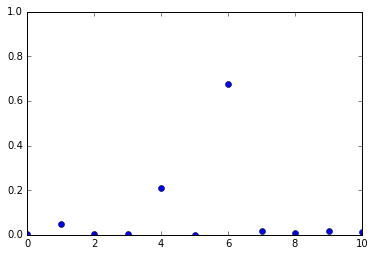

In [44]:
# running this on the decision tree

plt.plot(dt.feature_importances_,'o')
plt.ylim(0,1)
plt.xlim(0,10)
# free_sulfur_dioxide is the most important feature.

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)